In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#dropping unnecessary columns,
# since they can't be used in modelling
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4]:
#summarising data's information and we can see we don't have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
#statistical summary of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.groupby('Gender')['NumOfProducts'].count()

Gender
Female    4543
Male      5457
Name: NumOfProducts, dtype: int64

In [8]:
df.groupby('IsActiveMember').count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
IsActiveMember,,,,,,,,,,
0,4849,4849,4849,4849,4849,4849,4849,4849,4849,4849
1,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151


<Axes: xlabel='Exited', ylabel='count'>

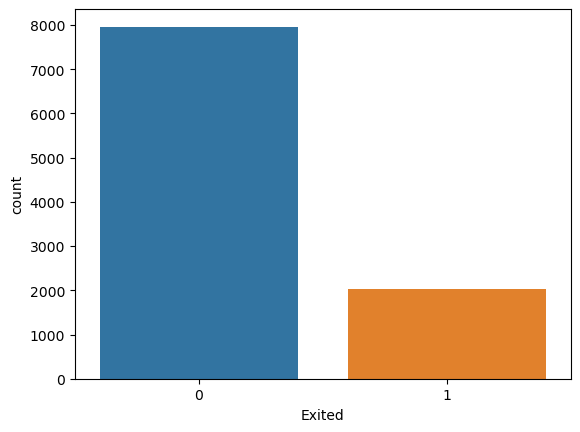

In [9]:
sns.countplot(x = df['Exited'])

In [10]:
df.shape

(10000, 11)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#encoding categorical variables,ml models only deal with numerical values
#i'm using a simple pandas.map() function
df['Geography'] = df['Geography'].map({'France':2,'Germany':1,'Spain':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [15]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1


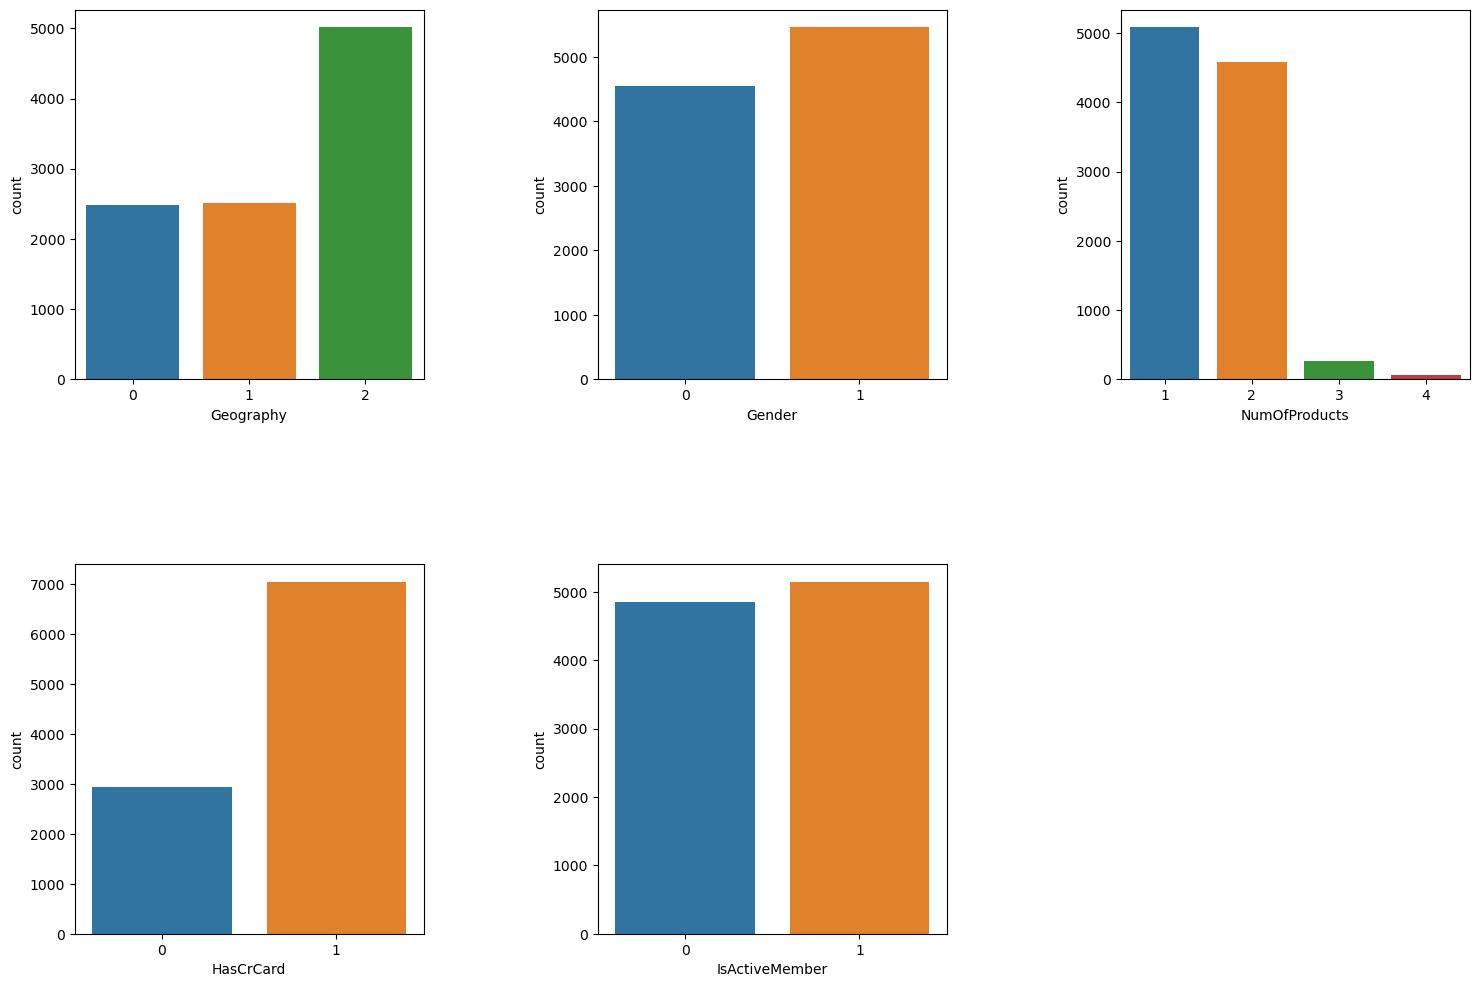

In [16]:
#summary of the distribution of the categorical columns
cat = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
plt.figure(figsize = (18,12))
n = 0
for col in cat:
    n = n+1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.countplot(x = df[col])

## All the distribution plots of numerical columns follows a Gaussian distribution and that's pretty good

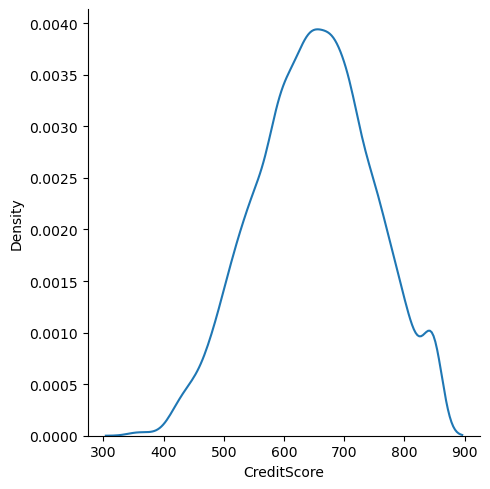

In [17]:
sns.displot(x = df['CreditScore'],kind = 'kde')

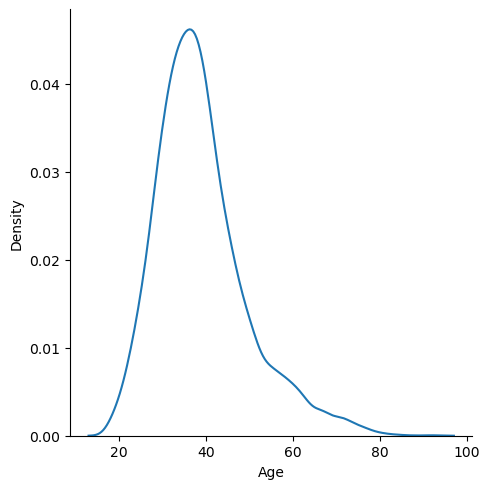

In [18]:
sns.displot(x = df['Age'],kind = 'kde')  

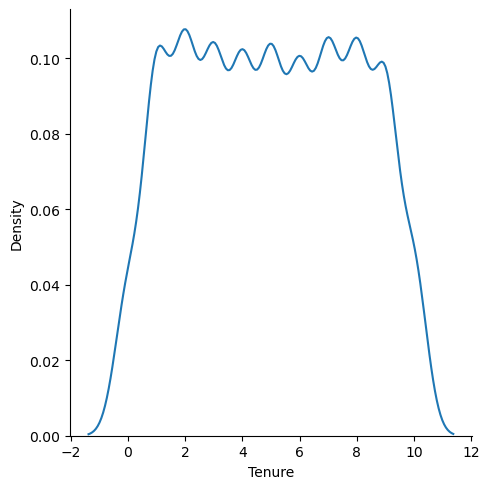

In [19]:
sns.displot(x = df['Tenure'],kind = 'kde')
    

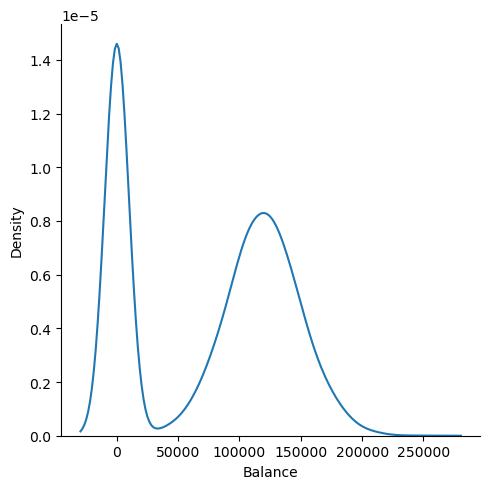

In [20]:
sns.displot(x = df['Balance'],kind = 'kde')
    

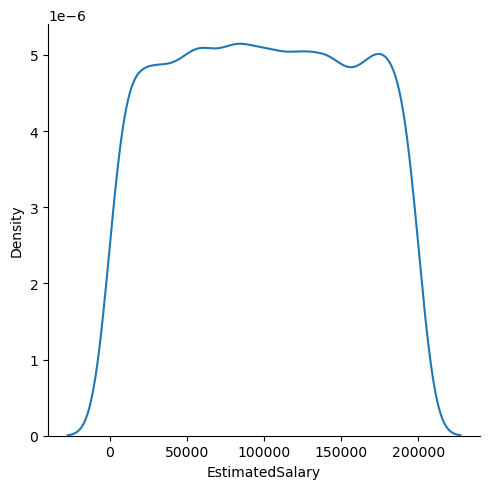

In [21]:
sns.displot(x = df['EstimatedSalary'],kind = 'kde')  

<Axes: >

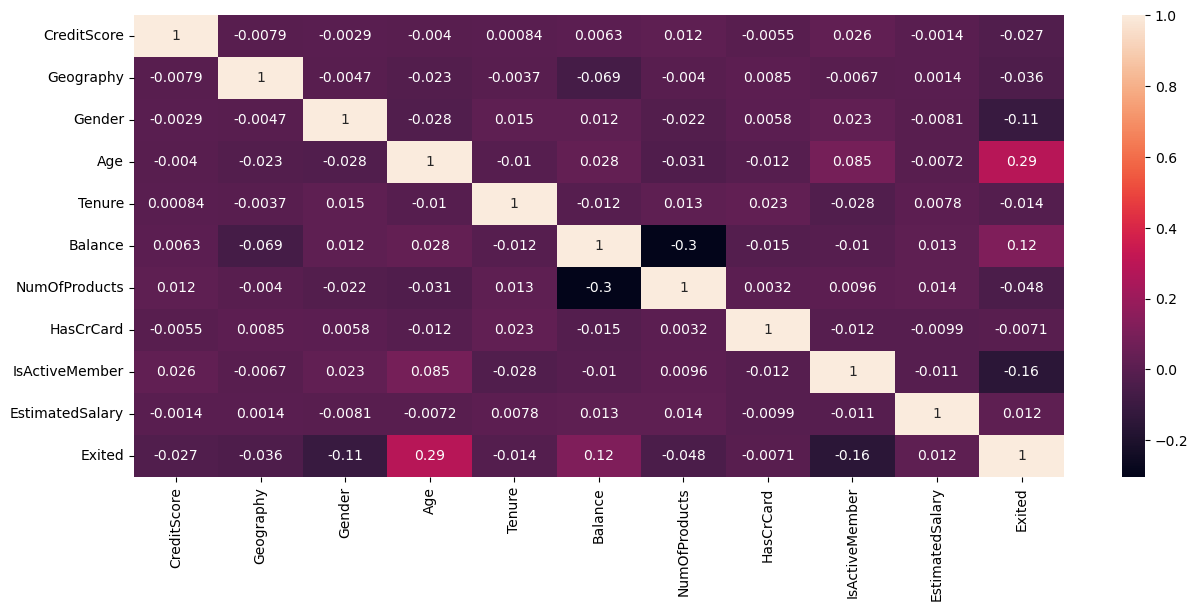

In [22]:
#plotting the correlation matrix,and checking the highly correlated values
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [23]:
#splitting into dependent and independent
X = df.drop('Exited',axis=1)
y = df['Exited']

In [24]:
X.shape

(10000, 10)

In [25]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=0)

In [26]:
#scaling the data
#it helps in bringing different features of the dataset onto a similar scale,
#preventing certain features from dominating others during model training.
#i'm using a standardscaler since our distribution follows a normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)#we transform it on the train data in order to avoid data leakage

In [27]:
X_train #it's a numpy array

array([[-0.09792126,  0.89238312,  0.92295821, ...,  0.64198477,
         0.96683535, -0.76862426],
       [-1.12612023,  0.89238312,  0.92295821, ...,  0.64198477,
        -1.03430227, -1.39359887],
       [-0.62230274,  0.89238312, -1.08347268, ..., -1.55766936,
         0.96683535, -1.49739308],
       ...,
       [ 0.89943174,  0.89238312,  0.92295821, ...,  0.64198477,
        -1.03430227,  1.41400417],
       [-0.62230274, -1.52039473, -1.08347268, ...,  0.64198477,
         0.96683535,  0.84625811],
       [-0.28299708, -0.3140058 , -1.08347268, ...,  0.64198477,
        -1.03430227,  0.32689267]])

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier = RandomForestClassifier()

In [31]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
pred = classifier.predict(X_test)
print(accuracy_score(y_test,pred))

0.8663333333333333


In [34]:
#defining a predictor model such that if we assume a user enter different values and need to make a prediction
p = [376,'Spain','Male',20,4,11000,4,'0','1',11930]
if p[1]=='France':
    p[1]=2
if p[1]=='Germany':
    p[1]=1
if p[1]=='Spain':
    p[1]=0
if p[2]=='Male':
    p[2]=1
if p[2]=='Female':
    p[2]=0
p

[376, 0, 1, 20, 4, 11000, 4, '0', '1', 11930]

In [35]:
#converting it into numpy array
arr = np.array(p)

In [37]:
#then reshaping it into 2D
arr = arr.reshape(1,-1)

In [38]:
#performing prediction
classifier.predict(arr)

array([1], dtype=int64)

In [39]:
#saving the model
import pickle 
pickle.dump(classifier,open('churn.pkl','wb'))